In [66]:
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data = pd.read_parquet(r'./investment_weekly.parquet', engine='fastparquet')
data.drop(['index', 'MarketCap_y'], axis=1, inplace=True)

# 컬럼 순서 변경
data = data[['Date', 'StockID', 'exchangeSymbol', 'tickerSymbol', 'companyName', 'Open', 'High', 'Close', 'Low', 'Vol', 'Shares', 'Ret',  
        'MarketCap_x', 'up_prob', 'reddit_factor', 'positive']]

In [132]:
# 각 거래소별 고유 티커 심볼의 개수를 계산
exchangeSymbol_dist = data.groupby('exchangeSymbol')['tickerSymbol'].nunique().reset_index()

# 칼럼 이름 변경
exchangeSymbol_dist.columns = ['exchangeSymbol', 'count']

# 내림차순으로 정렬
exchangeSymbol_dist.sort_values(by='count', ascending=False, inplace=True)


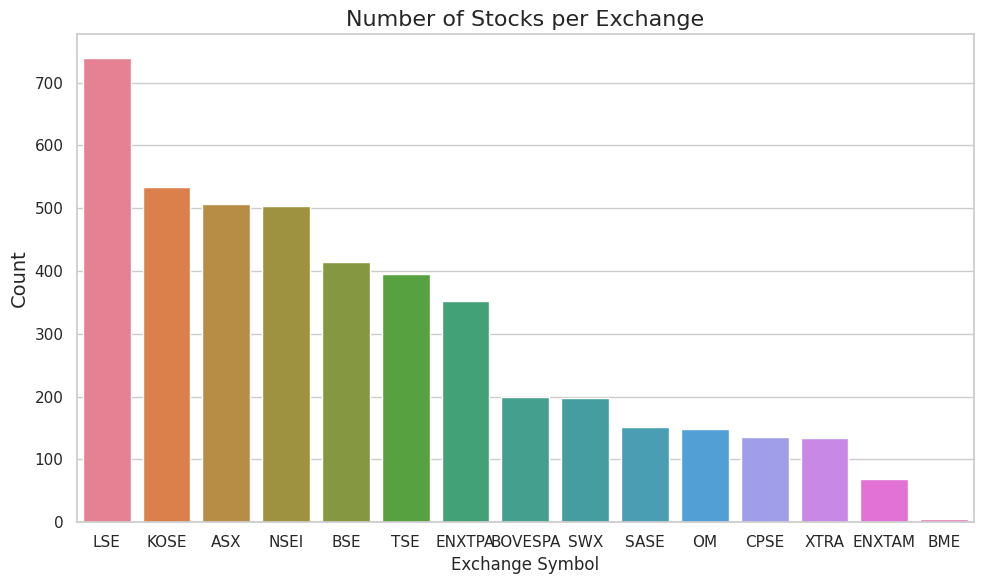

In [133]:
# Setting the graph size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Creating a color-coded barplot

sns.barplot(x='exchangeSymbol', y='count', data=exchangeSymbol_dist, hue='exchangeSymbol', palette='husl')

# Adding titles and labels
plt.title('Number of Stocks per Exchange', fontsize=16)
plt.xlabel('Exchange Symbol')
plt.ylabel('Count', fontsize=14)

# Saving the figure
plt.savefig('Number_of_stocks_per_exchange.png')

# Displaying the plot
plt.tight_layout()
plt.show()

In [106]:
# data_for_mean = data.drop(['StockID', 'tickerSymbol', 'companyName', 'up_prob', 'reddit_factor', 'positive'], axis=1)

<Axes: xlabel='Date', ylabel='Close'>

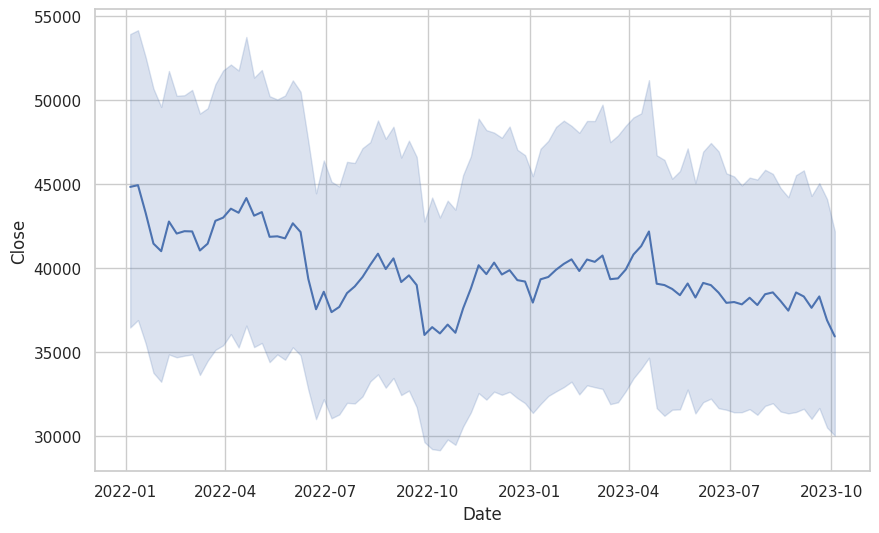

In [139]:
# 거래소 별로 분류
exchangeSymbol_list = data['exchangeSymbol'].unique()
# KRX ticker의 종가를 y, 날짜를 x로 설정
KRX = data[data['exchangeSymbol'] == 'KOSE']

# 인덱스를 기준으로 close를 lineplot으로 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=KRX)

<Axes: xlabel='Date', ylabel='reddit_factor'>

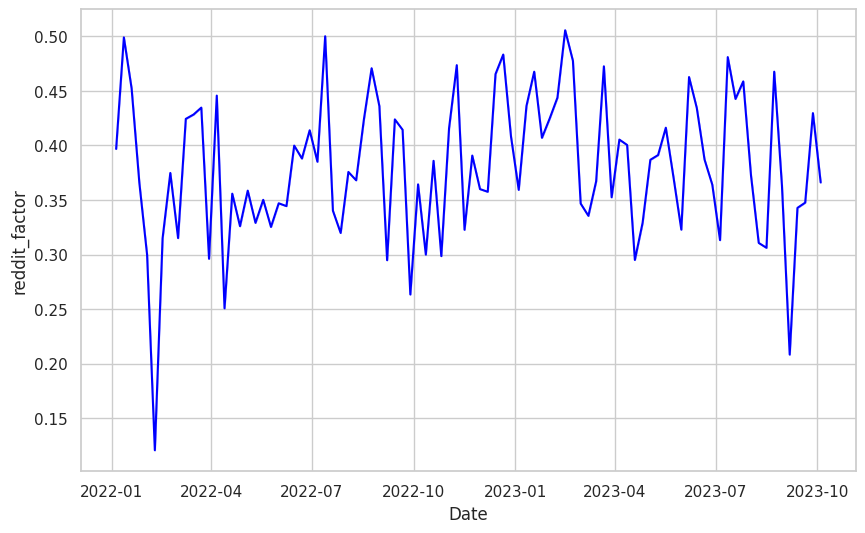

In [99]:
# 날짜와 reddit_factor의 상관관계
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Date', y='reddit_factor', data=data, color='blue')


In [93]:
# reddit factor는 일자 별로 모든 주식에 대한 reddit factor의 평균을 계산한 값이다.
# reddit factor의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 날짜가 x축
sns.lineplot(x=data.index.unique(), y='reddit_factor', data=data)

ValueError: Length of DatetimeIndex vectors must match length of `data` when both are used, but `data` has length 410823 and the vector passed to `x` has length 92.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# data의 